In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv('AEP_hourly.csv')

In [7]:
df

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0
...,...,...
121268,2018-01-01 20:00:00,21089.0
121269,2018-01-01 21:00:00,20999.0
121270,2018-01-01 22:00:00,20820.0
121271,2018-01-01 23:00:00,20415.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  121273 non-null  object 
 1   AEP_MW    121273 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.9+ MB


In [11]:
df.describe()

,AEP_MW
count,121273.000000
mean,15499.513717
std,2591.399065
min,9581.000000
25%,13630.000000
50%,15310.000000
75%,17200.000000
max,25695.000000


In [13]:
df['Datetime'] = pd.to_datetime(df['Datetime'])

In [17]:
print("First few rows of the DataFrame:")
print(df.head())

First few rows of the DataFrame:
             Datetime   AEP_MW
0 2004-12-31 01:00:00  13478.0
1 2004-12-31 02:00:00  12865.0
2 2004-12-31 03:00:00  12577.0
3 2004-12-31 04:00:00  12517.0
4 2004-12-31 05:00:00  12670.0


In [19]:
print("\nDatatype of Datetime column:")
print(df['Datetime'].dtype)


Datatype of Datetime column:
datetime64[ns]


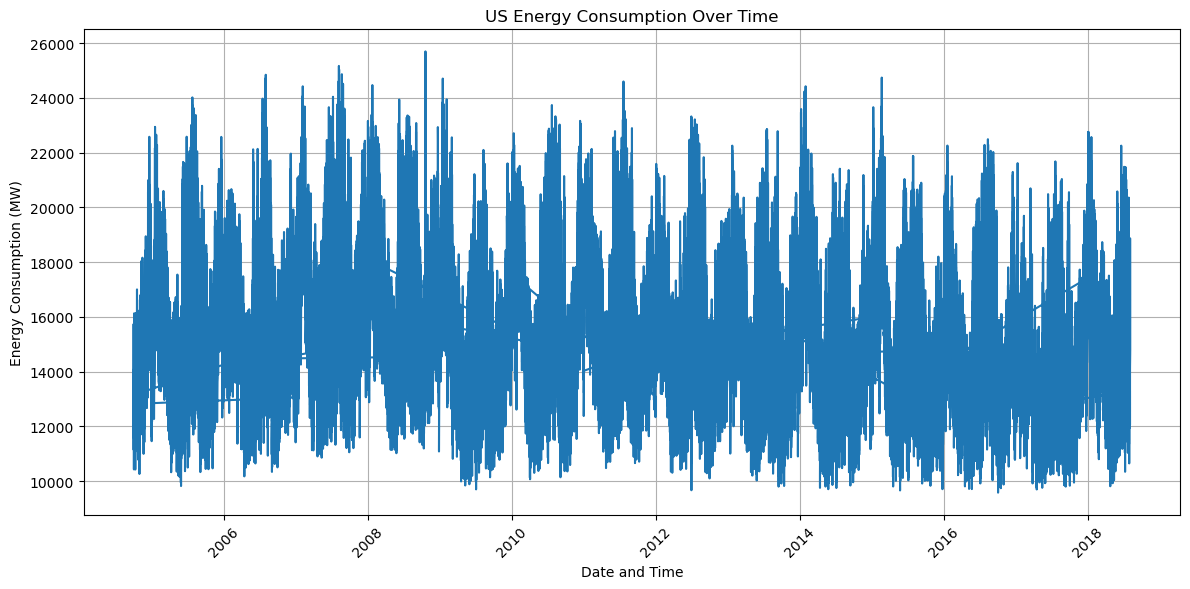

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(df['Datetime'], df['AEP_MW'])

plt.title('US Energy Consumption Over Time')
plt.xlabel('Date and Time')
plt.ylabel('Energy Consumption (MW)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

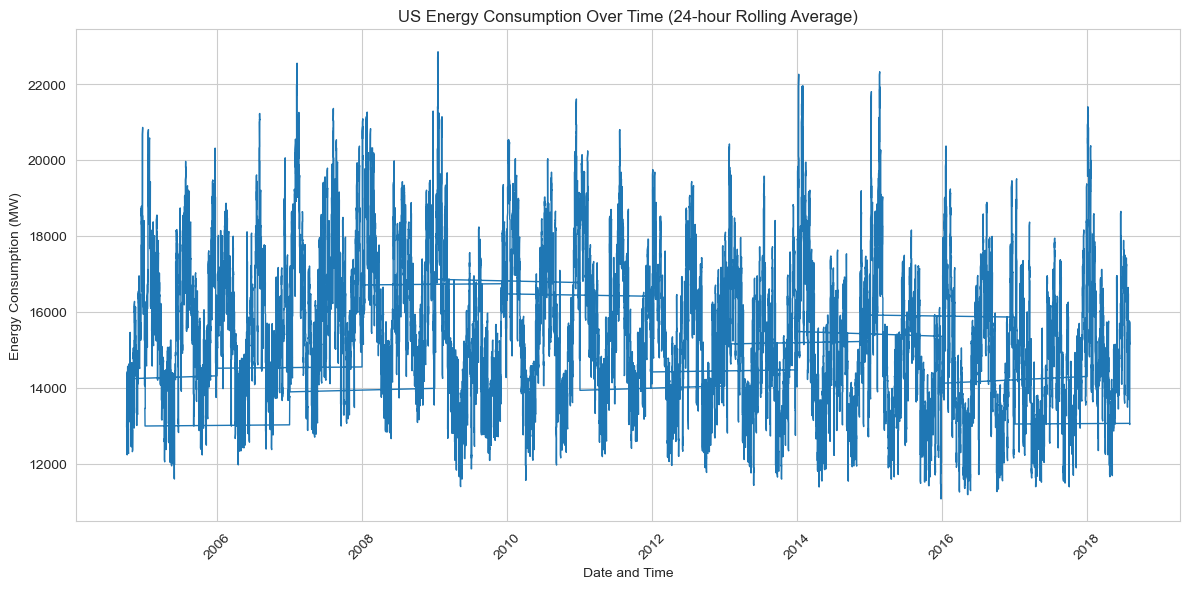

In [37]:
plt.figure(figsize=(12, 6))
df['rolling_average'] = df['AEP_MW'].rolling(window=24).mean()
plt.plot(df['Datetime'], df['rolling_average'], linewidth=1)
plt.title('US Energy Consumption Over Time (24-hour Rolling Average)')
plt.xlabel('Date and Time')
plt.ylabel('Energy Consumption (MW)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

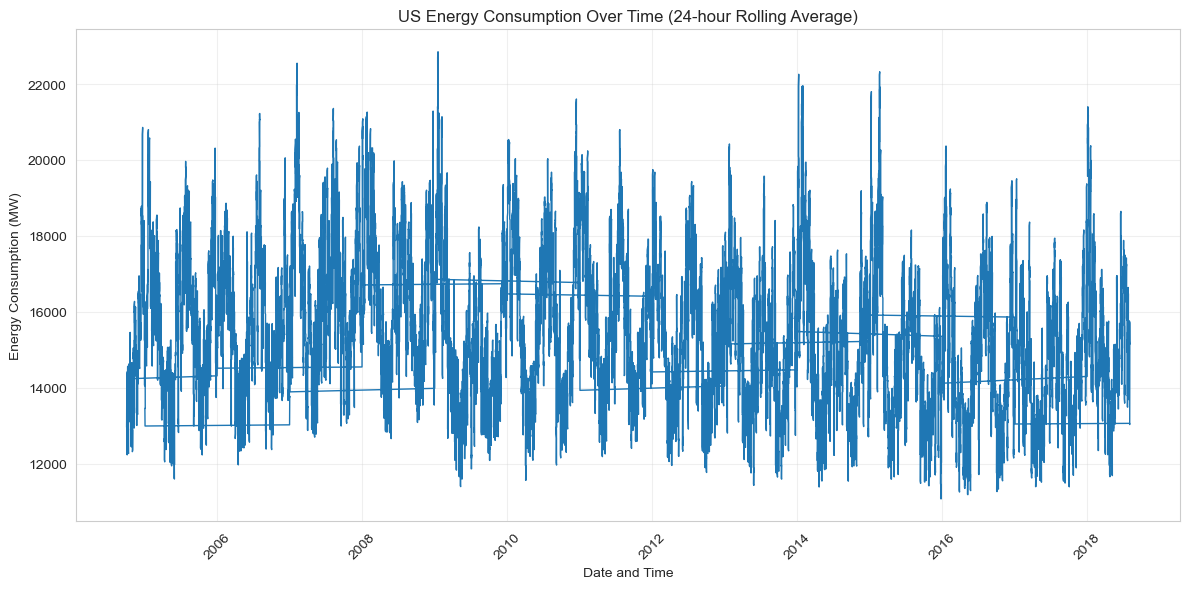

In [39]:
# Clear any existing plots
plt.close()

# Create new plot
plt.figure(figsize=(12, 6))
df['rolling_average'] = df['AEP_MW'].rolling(window=24).mean()
plt.plot(df['Datetime'], df['rolling_average'], linewidth=1)
plt.title('US Energy Consumption Over Time (24-hour Rolling Average)')
plt.xlabel('Date and Time')
plt.ylabel('Energy Consumption (MW)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [45]:
plt.clf()
plt.close('all')

plt.style.use('seaborn')  
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(df['Datetime'], df['rolling_average'], 
        linewidth=1, 
        color='blue') 

ax.set_title('US Energy Consumption Over Time (24-hour Rolling Average)')
ax.set_xlabel('Date and Time')
ax.set_ylabel('Energy Consumption (MW)')
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

OSError: 'seaborn' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

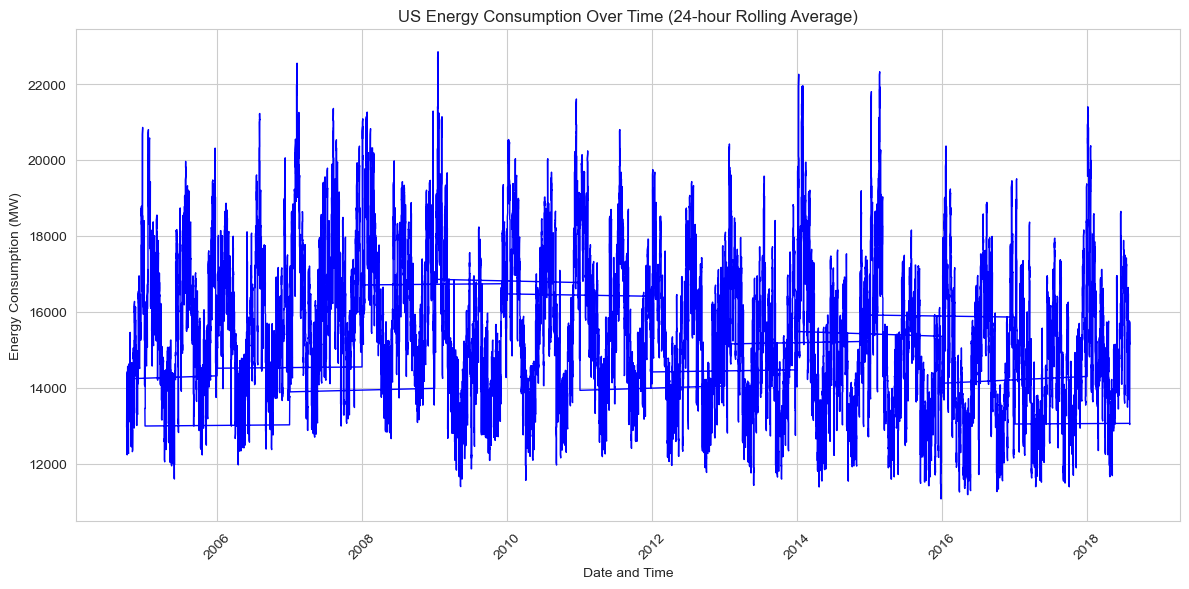

In [47]:
# Clear everything
plt.clf()
plt.close('all')

# Create fresh plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the data
ax.plot(df['Datetime'], df['rolling_average'], 
        linewidth=1, 
        color='blue')  # Explicitly set color

# Customize
ax.set_title('US Energy Consumption Over Time (24-hour Rolling Average)')
ax.set_xlabel('Date and Time')
ax.set_ylabel('Energy Consumption (MW)')
ax.tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

In [49]:
# Check for any extreme outliers or negative values
print("Data summary:")
print(df['AEP_MW'].describe())

# Check for any NaN or infinite values
print("\nNumber of NaN values:", df['AEP_MW'].isna().sum())
print("Number of infinite values:", np.isinf(df['AEP_MW']).sum())

# Look at where the biggest changes occur
df['change'] = df['AEP_MW'].diff()
print("\nBiggest changes in energy consumption:")
print(df.nlargest(5, 'change')[['Datetime', 'AEP_MW', 'change']])
print("\nBiggest drops in energy consumption:")
print(df.nsmallest(5, 'change')[['Datetime', 'AEP_MW', 'change']])

Data summary:
count    121273.000000
mean      15499.513717
std        2591.399065
min        9581.000000
25%       13630.000000
50%       15310.000000
75%       17200.000000
max       25695.000000
Name: AEP_MW, dtype: float64

Number of NaN values: 0
Number of infinite values: 0

Biggest changes in energy consumption:
                 Datetime   AEP_MW  change
30221 2008-10-20 14:00:00  25695.0  9342.0
97370 2015-02-20 01:00:00  22297.0  5909.0
98954 2016-12-16 01:00:00  19118.0  5509.0
28673 2008-12-23 01:00:00  19717.0  5347.0
45133 2009-02-06 01:00:00  19278.0  5343.0

Biggest drops in energy consumption:
                 Datetime   AEP_MW  change
30222 2008-10-20 15:00:00  15991.0 -9704.0
89714 2014-01-05 01:00:00  15602.0 -6449.0
89690 2014-01-06 01:00:00  14379.0 -6191.0
68022 2012-06-27 01:00:00  13416.0 -5903.0
46477 2010-12-12 01:00:00  14683.0 -5873.0


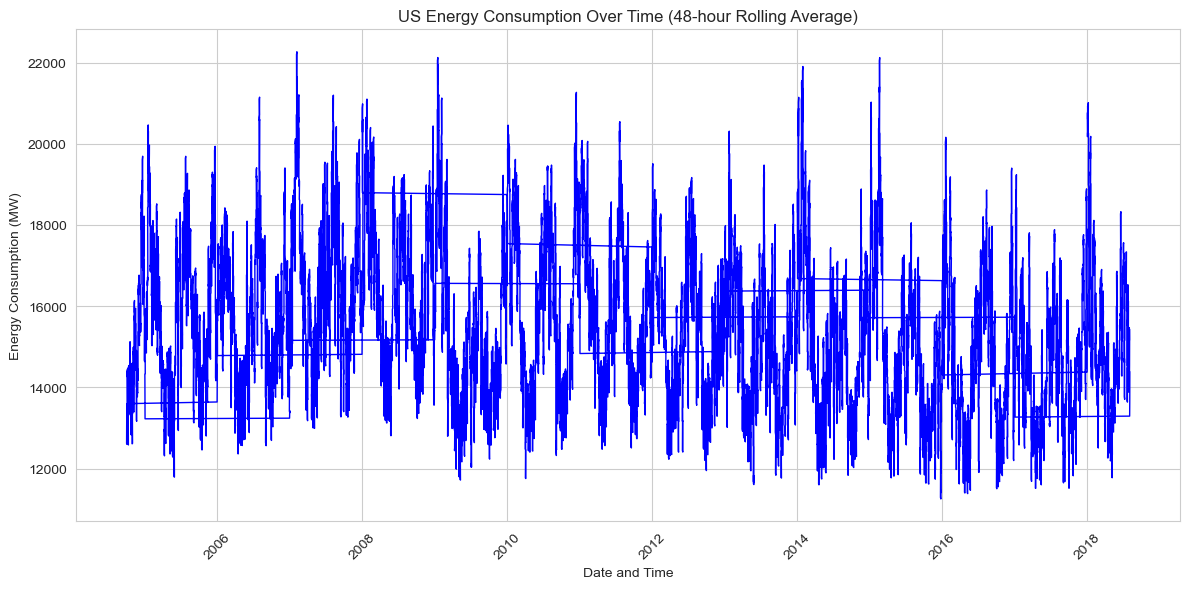

In [53]:
plt.clf()
plt.close('all')

fig, ax = plt.subplots(figsize=(12, 6))
df['rolling_average_48h'] = df['AEP_MW'].rolling(window=48).mean()
ax.plot(df['Datetime'], df['rolling_average_48h'], 
        linewidth=1, 
        color='blue')

ax.set_title('US Energy Consumption Over Time (48-hour Rolling Average)')
ax.set_xlabel('Date and Time')
ax.set_ylabel('Energy Consumption (MW)')
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

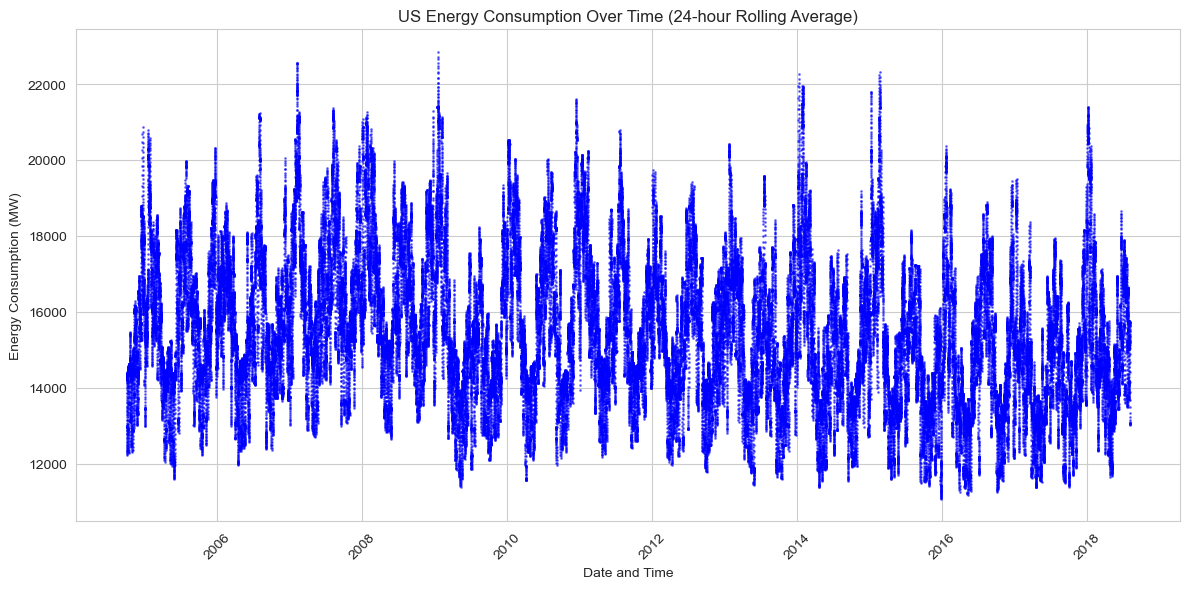

In [55]:
# Clear everything
plt.clf()
plt.close('all')

# Create a scatter plot with very small points
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(df['Datetime'], df['rolling_average'], 
           s=1,  # make points very small
           alpha=0.5,  # make them somewhat transparent
           color='blue')

ax.set_title('US Energy Consumption Over Time (24-hour Rolling Average)')
ax.set_xlabel('Date and Time')
ax.set_ylabel('Energy Consumption (MW)')
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

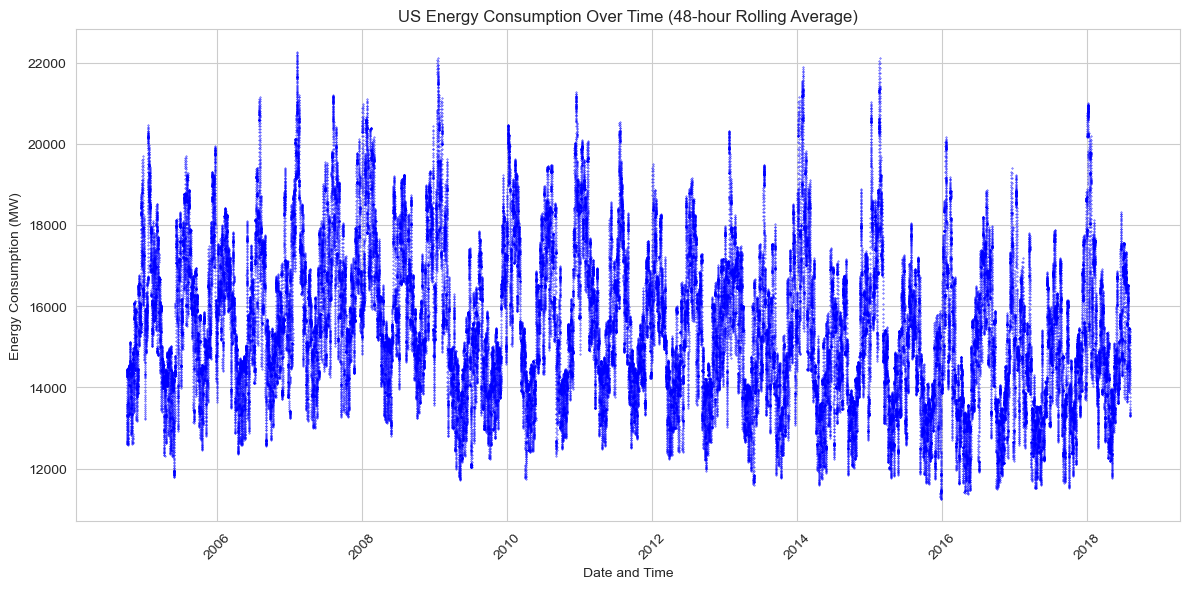

In [73]:
# Clear everything
plt.clf()
plt.close('all')

df['rolling_average_48h'] = df['AEP_MW'].rolling(window=48).mean()

# Create a scatter plot with very small points
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(df['Datetime'], df['rolling_average_48h'], 
           s=0.1,  # make points very small
           color='blue')

ax.set_title('US Energy Consumption Over Time (48-hour Rolling Average)')
ax.set_xlabel('Date and Time')
ax.set_ylabel('Energy Consumption (MW)')
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

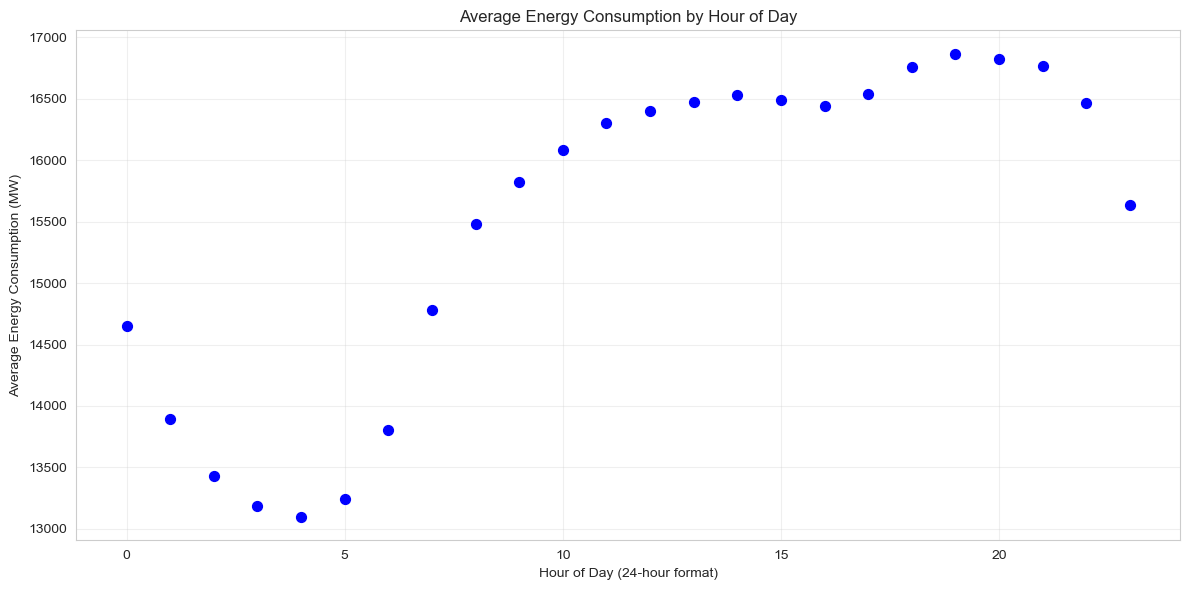

In [75]:
df['hour'] = df['Datetime'].dt.hour

hourly_avg = df.groupby('hour')['AEP_MW'].mean().reset_index()

plt.clf()
plt.close('all')

fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(hourly_avg['hour'], hourly_avg['AEP_MW'],
           color='blue', s=50)
ax.set_title('Average Energy Consumption by Hour of Day')
ax.set_xlabel('Hour of Day (24-hour format)')
ax.set_ylabel('Average Energy Consumption (MW)')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show

In [77]:
# Basic statistics for each hour
print("Hourly Statistics:")
print(hourly_avg.describe())

# Find peak and minimum hours
peak_hour = hourly_avg.loc[hourly_avg['AEP_MW'].idxmax()]
min_hour = hourly_avg.loc[hourly_avg['AEP_MW'].idxmin()]

print("\nPeak Usage Hour:", peak_hour['hour'])
print("Minimum Usage Hour:", min_hour['hour'])

Hourly Statistics:
            hour        AEP_MW
count  24.000000     24.000000
mean   11.500000  15499.125916
std     7.071068   1349.637181
min     0.000000  13095.193350
25%     5.750000  14461.263285
50%    11.500000  16195.299763
75%    17.250000  16503.273034
max    23.000000  16868.728334

Peak Usage Hour: 19.0
Minimum Usage Hour: 4.0


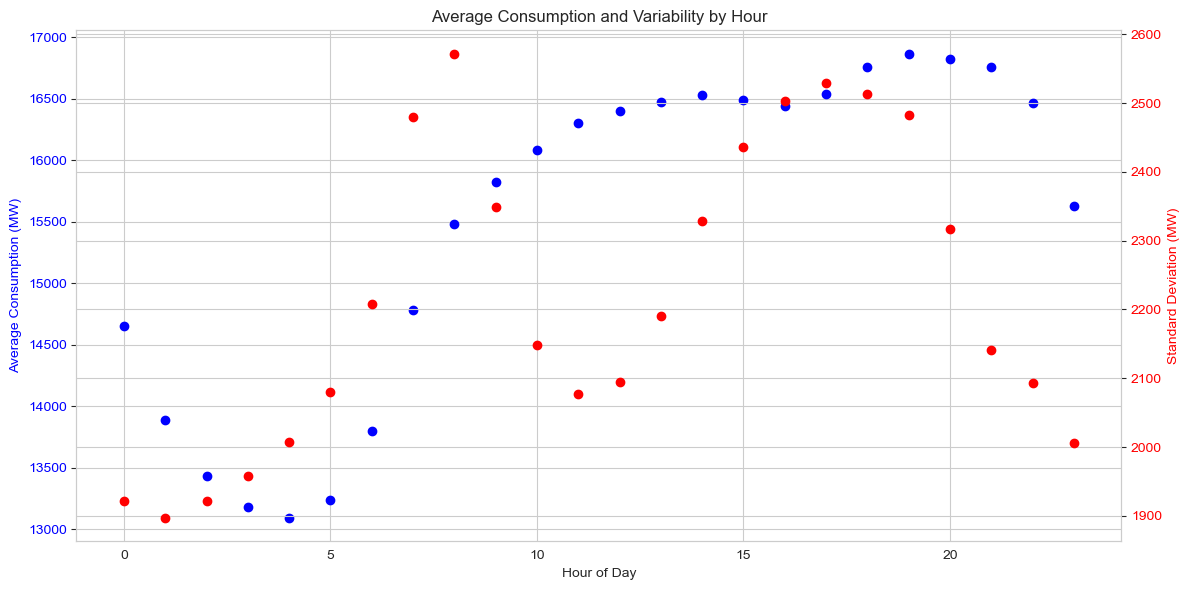

In [79]:
# Calculate standard deviation for each hour
hourly_std = df.groupby('hour')['AEP_MW'].std().reset_index()

# Create a dual-axis plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot mean on primary axis
color1 = 'blue'
ax1.scatter(hourly_avg['hour'], hourly_avg['AEP_MW'], color=color1, label='Mean Consumption')
ax1.set_xlabel('Hour of Day')
ax1.set_ylabel('Average Consumption (MW)', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

# Plot standard deviation on secondary axis
ax2 = ax1.twinx()
color2 = 'red'
ax2.scatter(hourly_std['hour'], hourly_std['AEP_MW'], color=color2, label='Standard Deviation')
ax2.set_ylabel('Standard Deviation (MW)', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

plt.title('Average Consumption and Variability by Hour')
plt.tight_layout()
plt.show()

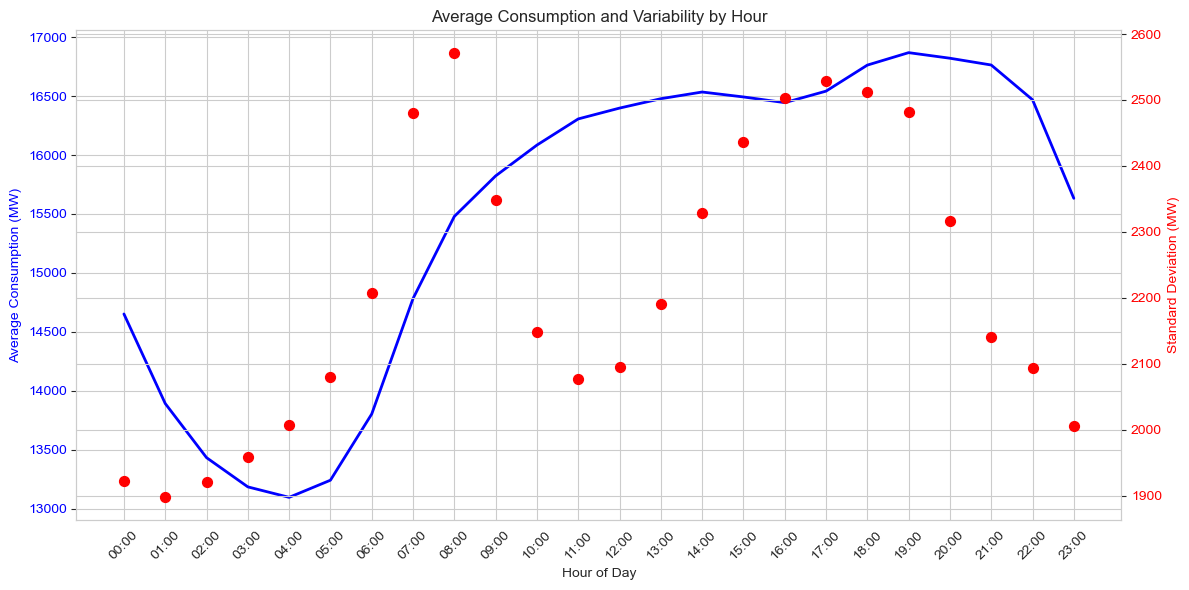

In [83]:
plt.clf()
plt.close('all')

fig, ax1 = plt.subplots(figsize=(12, 6))

color1 = 'blue'
ax1.plot(hourly_avg['hour'], hourly_avg['AEP_MW'], 
         color=color1, 
         label='Mean Consumption',
         linewidth=2)
ax1.set_xlabel('Hour of Day')
ax1.set_ylabel('Average Consumption (MW)', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

ax1.set_xticks(range(0, 24))
ax1.set_xticklabels([str(i).zfill(2) + ':00' for i in range(24)], rotation=45)

ax2 = ax1.twinx()
color2 = 'red'
ax2.scatter(hourly_std['hour'], hourly_std['AEP_MW'], 
            color=color2, 
            label='Standard Deviation',
            s=50)
ax2.set_ylabel('Standard Deviation (MW)', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

plt.title('Average Consumption and Variability by Hour')
plt.tight_layout()
plt.show()